In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In C:\Users\KUMAR SANU\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\KUMAR SANU\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\KUMAR SANU\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\KUMAR SANU\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\KUMAR SANU\anaconda3\lib\site-packages\matplotlib\mpl-data\s

In [2]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 6E82-34BE

 Directory of C:\Users\KUMAR SANU\Assignment\Clustering

12-03-2021  10:36    <DIR>          .
12-03-2021  10:36    <DIR>          ..
12-03-2021  10:36    <DIR>          .ipynb_checkpoints
12-03-2021  10:35             1,328 crime_data.csv
12-03-2021  10:35           268,963 EastWestAirlines.xlsx
12-03-2021  10:35             1,560 Problem_Statement(Airlines).txt
12-03-2021  10:35               389 ProblemSatement(crime_data).txt
12-03-2021  10:36                72 Untitled.ipynb
               5 File(s)        272,312 bytes
               3 Dir(s)  196,530,974,720 bytes free


In [3]:
crime=pd.read_csv('crime_data.csv')

In [4]:
crime.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
crime.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [6]:
crime.median()

Murder        7.25
Assault     159.00
UrbanPop     66.00
Rape         20.10
dtype: float64

In [7]:
crime.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [8]:
crime.std()

Murder       4.355510
Assault     83.337661
UrbanPop    14.474763
Rape         9.366385
dtype: float64

<AxesSubplot:>

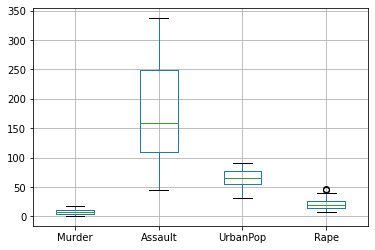

In [9]:
crime.boxplot() #We have outlier in rape columns

array([[<AxesSubplot:title={'center':'Murder'}>,
        <AxesSubplot:title={'center':'Assault'}>],
       [<AxesSubplot:title={'center':'UrbanPop'}>,
        <AxesSubplot:title={'center':'Rape'}>]], dtype=object)

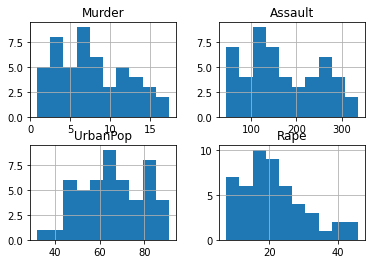

In [10]:
crime.hist()

In [11]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [13]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime.iloc[:,1:])

In [14]:
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


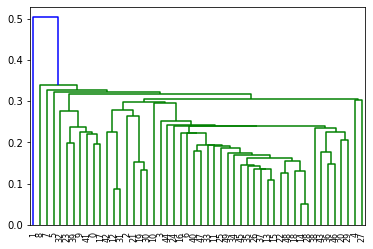

In [15]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [23]:
# create clusters
crime = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')
crime

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=4)

In [24]:
df_norm.shape

(50, 4)

In [25]:
crime.fit_predict(df_norm)

array([0, 3, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [26]:
# save clusters for chart
y_hc = crime.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [29]:
y_hc

array([0, 3, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [30]:
df_norm['h_clusterid'] = y_hc 

In [31]:
df_norm

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,3
2,0.439759,0.852740,0.813559,0.612403,0
3,0.481928,0.496575,0.305085,0.315245,0
4,0.493976,0.791096,1.000000,0.860465,0
5,0.427711,0.544521,0.779661,0.811370,0
6,0.150602,0.222603,0.762712,0.098191,0
7,0.307229,0.660959,0.677966,0.219638,1
8,0.879518,0.993151,0.813559,0.635659,2
9,1.000000,0.568493,0.474576,0.478036,0


# K-Means

In [32]:
from sklearn.cluster import KMeans

In [33]:
model_kmeans = KMeans(n_clusters=4) 
model_kmeans.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
model_kmeans.labels_


array([2, 1, 2, 3, 2, 2, 3, 3, 1, 2, 3, 0, 2, 3, 0, 3, 0, 2, 0, 2, 3, 2,
       0, 2, 2, 0, 0, 2, 0, 3, 2, 2, 2, 0, 3, 3, 3, 3, 3, 2, 0, 2, 2, 3,
       0, 3, 3, 0, 0, 3])

In [35]:
model_kmeans.inertia_

6.274001491689889

In [37]:
md=pd.Series(model_kmeans.labels_)
md

0     2
1     1
2     2
3     3
4     2
5     2
6     3
7     3
8     1
9     2
10    3
11    0
12    2
13    3
14    0
15    3
16    0
17    2
18    0
19    2
20    3
21    2
22    0
23    2
24    2
25    0
26    0
27    2
28    0
29    3
30    2
31    2
32    2
33    0
34    3
35    3
36    3
37    3
38    3
39    2
40    0
41    2
42    2
43    3
44    0
45    3
46    3
47    0
48    0
49    3
dtype: int32

In [38]:
#Complete-linkage clustering - Wikipedia
l=[]
for i in range(2,10):
    model_kmeans = KMeans(n_clusters=i) 
    model_kmeans.fit(df_norm)
    l.append(model_kmeans.inertia_)

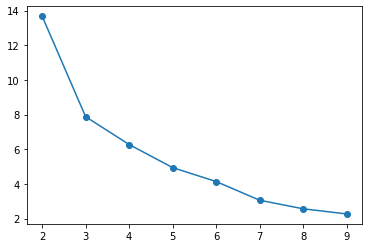

In [39]:
plt.scatter(list(range(2,10)),l)
plt.plot(list(range(2,10)),l)

# DBSCAN

In [40]:
from sklearn.cluster import DBSCAN 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [41]:
from sklearn.datasets import make_moons
x,y=make_moons(100)
data=pd.DataFrame(x)
data.columns=["f1","f2"]
data["class"]=y
data.head()

,f1,f2,class
0,-0.284528,0.958668,0
1,-0.900969,0.433884,0
2,-0.926917,0.375267,0
3,0.128681,0.009282,1
4,0.281651,-0.195683,1


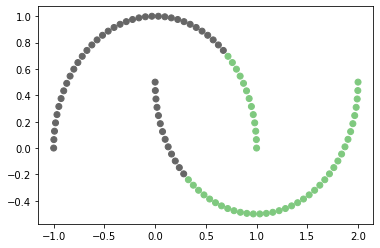

In [42]:
#using kmeans
model = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
model.fit(data.iloc[:,:2])
plt.scatter(data["f1"],data["f2"],c=model.labels_,cmap=plt.cm.Accent)

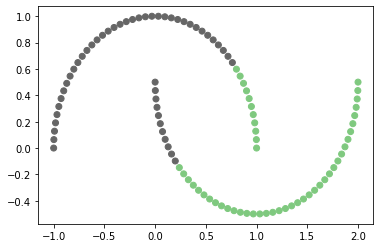

In [43]:
#using hierarchical

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage="complete") #in place of linkage= complete you can use single
plt.scatter(data["f1"],data["f2"],c=cluster.fit_predict(data.iloc[:,:2]),cmap=plt.cm.Accent) #cmap is colours map
